In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
df =pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")


In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Column Description
#### 1) url: contains the url of the restaurant in the zomato website
#### 2) address: contains the address of the restaurant in Bengaluru
#### 3) name: contains the name of the restaurant
#### 4) online_order: whether online ordering is available in the restaurant or not
#### 5) book_table: table book option available or not
#### 6) rate: contains the overall rating of the restaurant out of 5
#### 7) votes: contains total number of rating for the restaurant as of the above mentioned date
#### 8) phone: contains the phone number of the restaurant
#### 9) location: contains the neighborhood in which the restaurant is located
#### 10) rest_type: restaurant type
#### 11) dish_liked: dishes people liked in the restaurant
#### 12) cuisines: food styles, separated by comma
#### 13) avg_cost(for two people): contains the approximate cost for meal for two people
#### 14) reviews_list: list of tuples containing reviews for the restaurant, each tuple
#### 15) menu_item: contains list of menus available in the restaurant
#### 16) listed_in(type): type of meal
#### 17) listed_in(city): contains the neighborhood in which the restaurant is listed

In [7]:
# !pip install ydata-profiling

# from ydata_profiling import ProfileReport

# profile = ProfileReport(df)

# profile.to_file(output_file="output.html")


In [8]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
# check null value percent
(df.isna().sum()/df.shape[0])*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
unique_rates = df['rate'].unique()
rate_counts = df['rate'].value_counts()

for rate, count in zip(unique_rates, rate_counts):
    print(f"Rate: {rate}, Count: {count}")

Rate: 4.1/5, Count: 2208
Rate: 3.8/5, Count: 2098
Rate: 3.7/5, Count: 2022
Rate: 3.6/5, Count: 2011
Rate: 4.6/5, Count: 1874
Rate: 4.0/5, Count: 1851
Rate: 4.2/5, Count: 1810
Rate: 3.9/5, Count: 1773
Rate: 3.1/5, Count: 1609
Rate: 3.0/5, Count: 1574
Rate: 3.2/5, Count: 1543
Rate: 3.3/5, Count: 1474
Rate: 2.8/5, Count: 1474
Rate: 4.4/5, Count: 1431
Rate: 4.3/5, Count: 1353
Rate: NEW, Count: 1259
Rate: 2.9/5, Count: 1217
Rate: 3.5/5, Count: 1168
Rate: nan, Count: 1165
Rate: 2.6/5, Count: 1142
Rate: 3.8 /5, Count: 1019
Rate: 3.4/5, Count: 1006
Rate: 4.5/5, Count: 917
Rate: 2.5/5, Count: 867
Rate: 2.7/5, Count: 862
Rate: 4.7/5, Count: 776
Rate: 2.4/5, Count: 699
Rate: 2.2/5, Count: 628
Rate: 2.3/5, Count: 558
Rate: 3.4 /5, Count: 519
Rate: -, Count: 465
Rate: 3.6 /5, Count: 427
Rate: 4.8/5, Count: 409
Rate: 3.9 /5, Count: 375
Rate: 4.2 /5, Count: 313
Rate: 4.0 /5, Count: 287
Rate: 4.1 /5, Count: 247
Rate: 3.7 /5, Count: 175
Rate: 3.1 /5, Count: 170
Rate: 2.9 /5, Count: 143
Rate: 3.3 /5, Co

In [11]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [12]:
unique_rates = df['rate'].unique()
rate_counts = df['rate'].value_counts()

for rate, count in zip(unique_rates, rate_counts):
    print(f"Rate: {rate}, Count: {count}")

Rate: 4.1, Count: 3972
Rate: 3.8, Count: 3873
Rate: 3.7, Count: 3821
Rate: 3.6, Count: 3316
Rate: 4.6, Count: 3183
Rate: 4.0, Count: 2948
Rate: 4.2, Count: 2784
Rate: 3.9, Count: 2476
Rate: 3.1, Count: 2310
Rate: 3.0, Count: 2277
Rate: 3.2, Count: 2184
Rate: 3.3, Count: 1873
Rate: 2.8, Count: 1693
Rate: 4.4, Count: 1561
Rate: 4.3, Count: 1147
Rate: NaN, Count: 1023
Rate: 2.9, Count: 802
Rate: 3.5, Count: 656
Rate: nan, Count: 600
Rate: 2.6, Count: 307
Rate: 3.4, Count: 300
Rate: 4.5, Count: 260
Rate: 2.5, Count: 167
Rate: 2.7, Count: 101
Rate: 4.7, Count: 70
Rate: 2.4, Count: 66
Rate: 2.2, Count: 55
Rate: 2.3, Count: 51
Rate: 4.8, Count: 26
Rate: 4.9, Count: 24
Rate: 2.1, Count: 11
Rate: 2.0, Count: 5


## DATA CLEANING

#### Here we will clean our data for wrong dtypes,we will handle null values , remove irrelevant columns, outliers etc.




In [13]:

# df['rate'].fillna(nan, inplace=True)
# df['rate'] = df['rate'].replace('NaN', nan)

In [14]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [15]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']


In [16]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   dish_liked                   23639 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [18]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [20]:
# df['location'].unique()
loc_counts = df['location'].value_counts()
print(loc_counts)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64


In [21]:
df = df.dropna(subset=['location'])
df = df.dropna(subset=['cuisines'])

In [22]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7741
votes                              0
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [23]:
df = df.rename(columns={'approx_cost(for two people)': 'avg_cost', 'listed_in(city)': 'city','listed_in(type)':'meal_type'})


In [24]:
df.dropna(subset=['rest_type','avg_cost'],inplace=True)

In [25]:
df.isna().sum()

online_order        0
book_table          0
rate             7615
votes               0
location            0
rest_type           0
dish_liked      27713
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

In [26]:
df['rest_type' ].unique()



array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [27]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [28]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## As you see 'Location' columns has more sublocations and 'city' columns have a better Locations so we drop 'Location' column

In [29]:
del df['location']

In [30]:
df["avg_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
df['avg_cost'] = df['avg_cost'].str.replace("nan", "NaN")
df['avg_cost'] = df['avg_cost'].fillna('NaN')
df['avg_cost'] = df['avg_cost'].str.replace(",","" )

In [32]:
df["avg_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', '1400', '180', '1350', '2200',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '3200', '60', '560', '240', '360', '6000',
       '1050', '2300', '4100', '5000', '3700', '1650', '2700', '4500',
       '140'], dtype=object)

In [33]:
del df['dish_liked']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   online_order  51148 non-null  object
 1   book_table    51148 non-null  object
 2   rate          43533 non-null  object
 3   votes         51148 non-null  int64 
 4   rest_type     51148 non-null  object
 5   cuisines      51148 non-null  object
 6   avg_cost      51148 non-null  object
 7   meal_type     51148 non-null  object
 8   city          51148 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.9+ MB


In [35]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [98]:
df_c= df.cuisines.value_counts()
df_c

cuisines
1811    2858
1885    2355
2448    1822
401      906
271      899
        ... 
347        1
2160       1
1185       1
1842       1
1897       1
Name: count, Length: 2704, dtype: int64

In [38]:
df['avg_cost'] = df['avg_cost'].astype(float)
df['rate'] = df['rate'].astype(float)
df.describe()

,rate,votes,avg_cost
count,41263.000000,51148.000000,51148.000000
mean,3.702011,284.917885,556.043736
std,0.439985,806.495210,439.555299
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [39]:
df.head(5)

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# 4. Data Visualization


## distribution of numeric columns

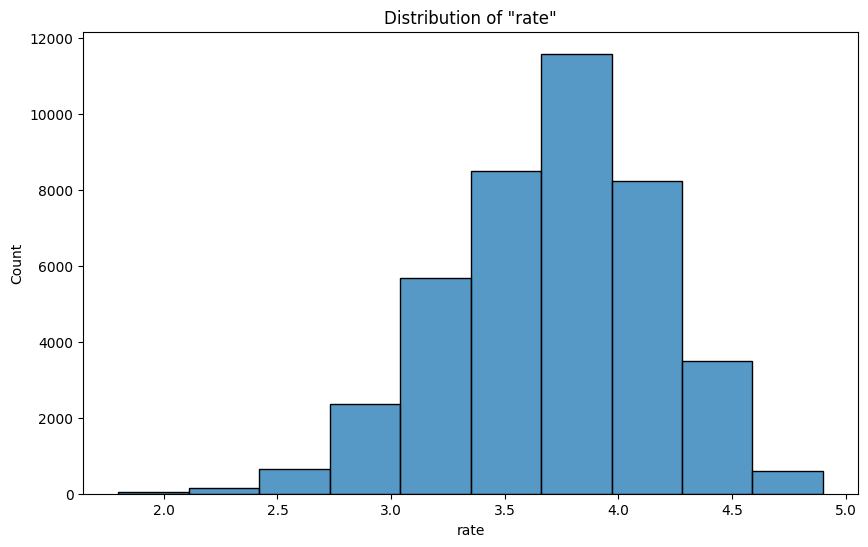

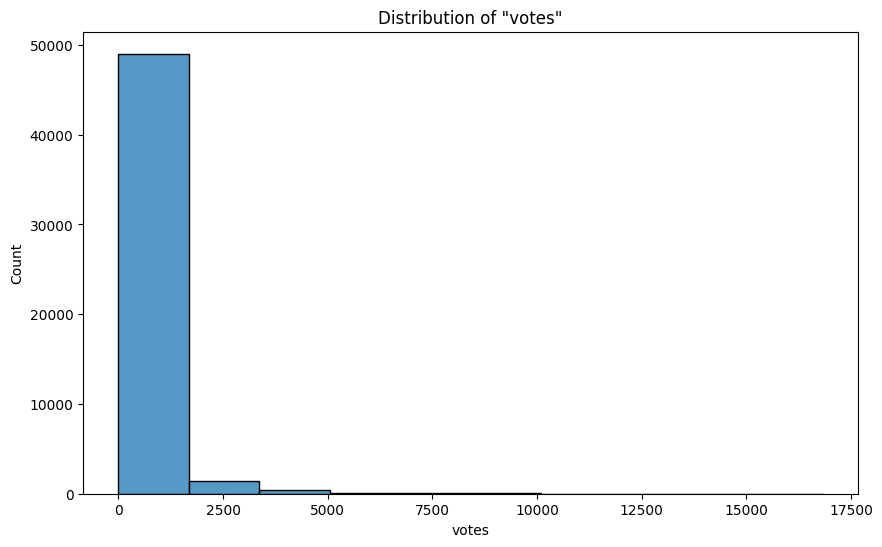

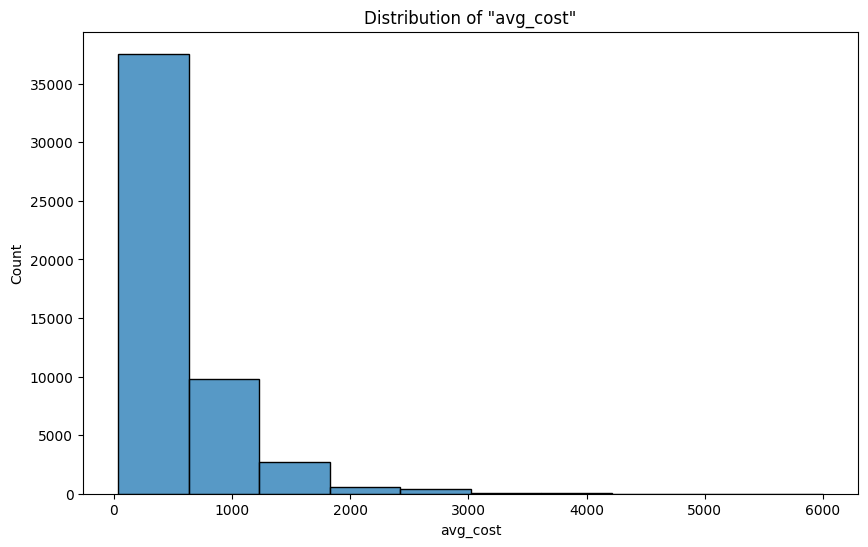

In [40]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=10)
    plt.title(f'Distribution of "{col}"')
    plt.show()

In [41]:

df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

## Number of restaurtants that take online order

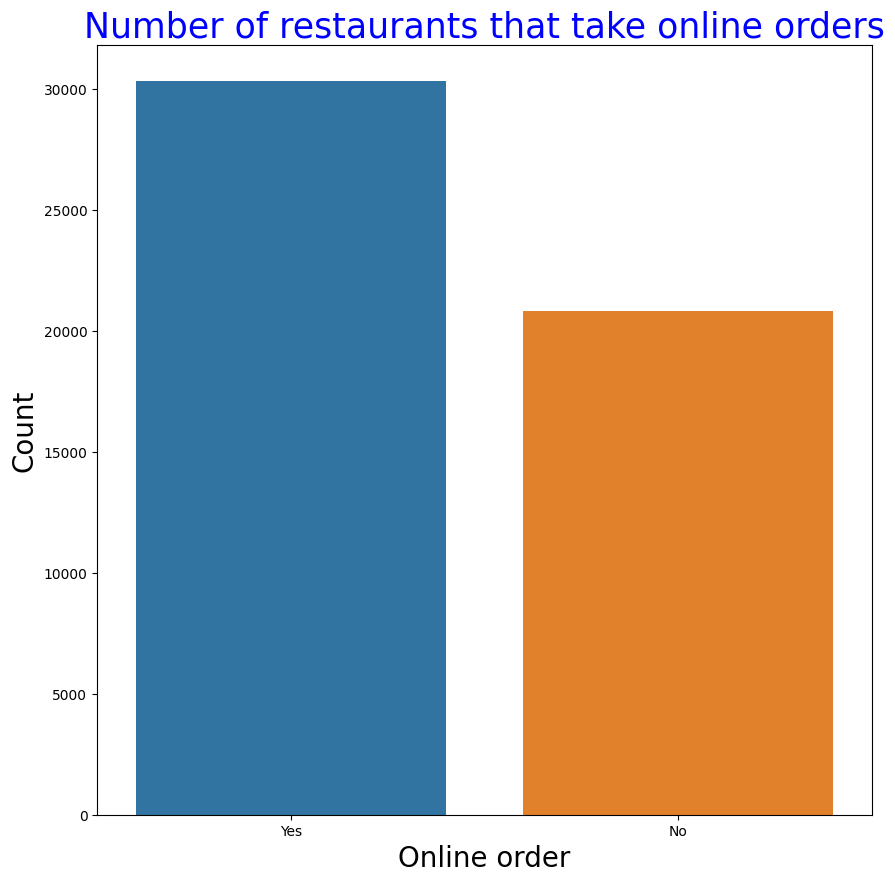

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['online_order'])
plt.title("Number of restaurants that take online orders", fontsize=25, color='blue')
plt.ylabel("Count", fontsize=20)
plt.xlabel("Online order", fontsize=20)
plt.show()

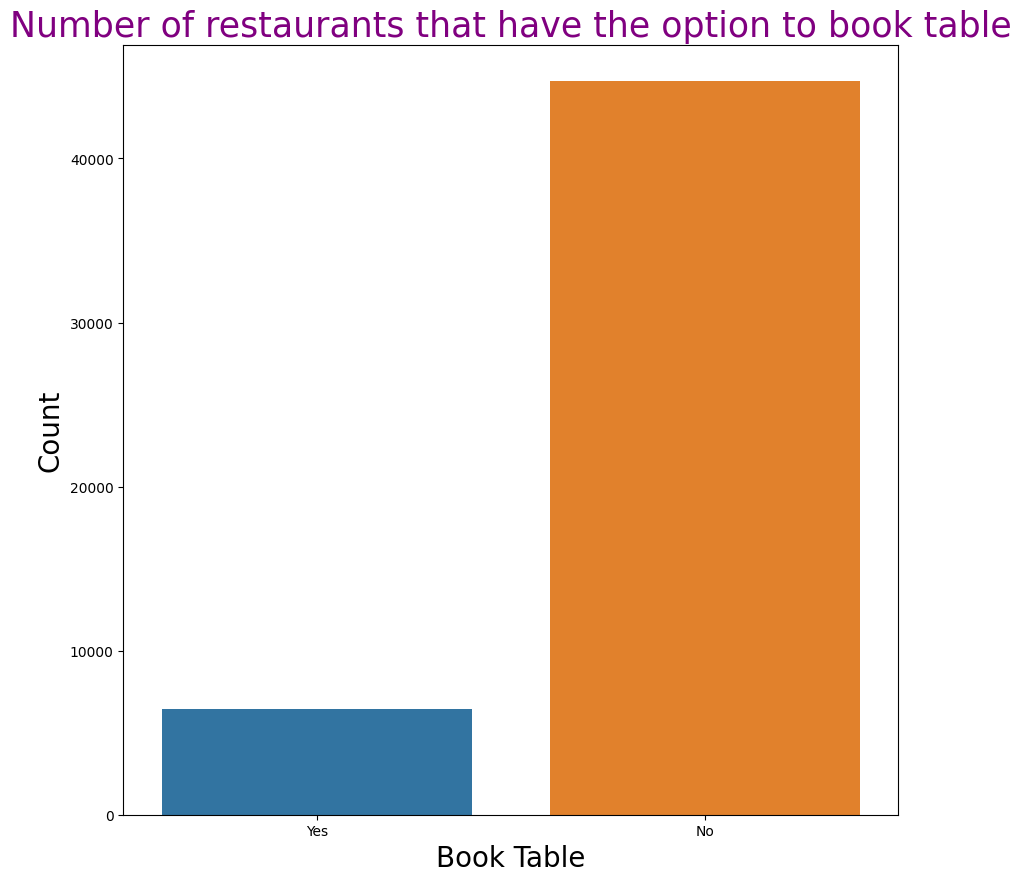

In [43]:
plt.figure(figsize=(10,10))

sns.countplot(x=df['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

In [48]:
ax =df.meal_type.value_counts()
ax

meal_type
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

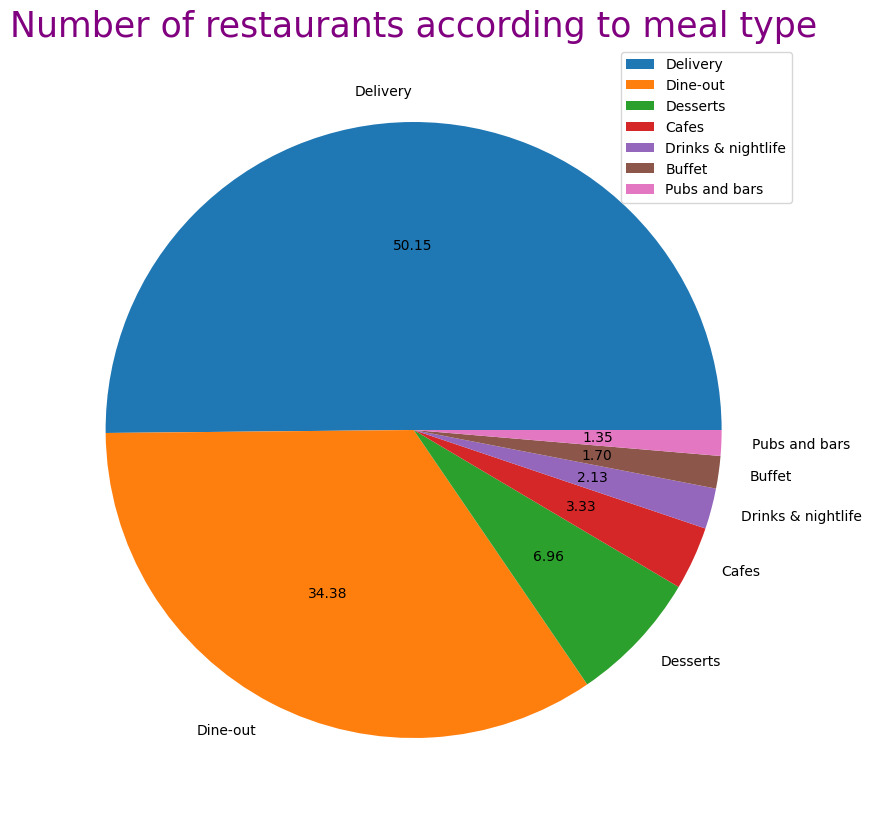

In [60]:
plt.figure(figsize=(10,10))
ax =df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of restaurants according to meal type",fontsize=25,color='purple')
plt.legend()
plt.show()

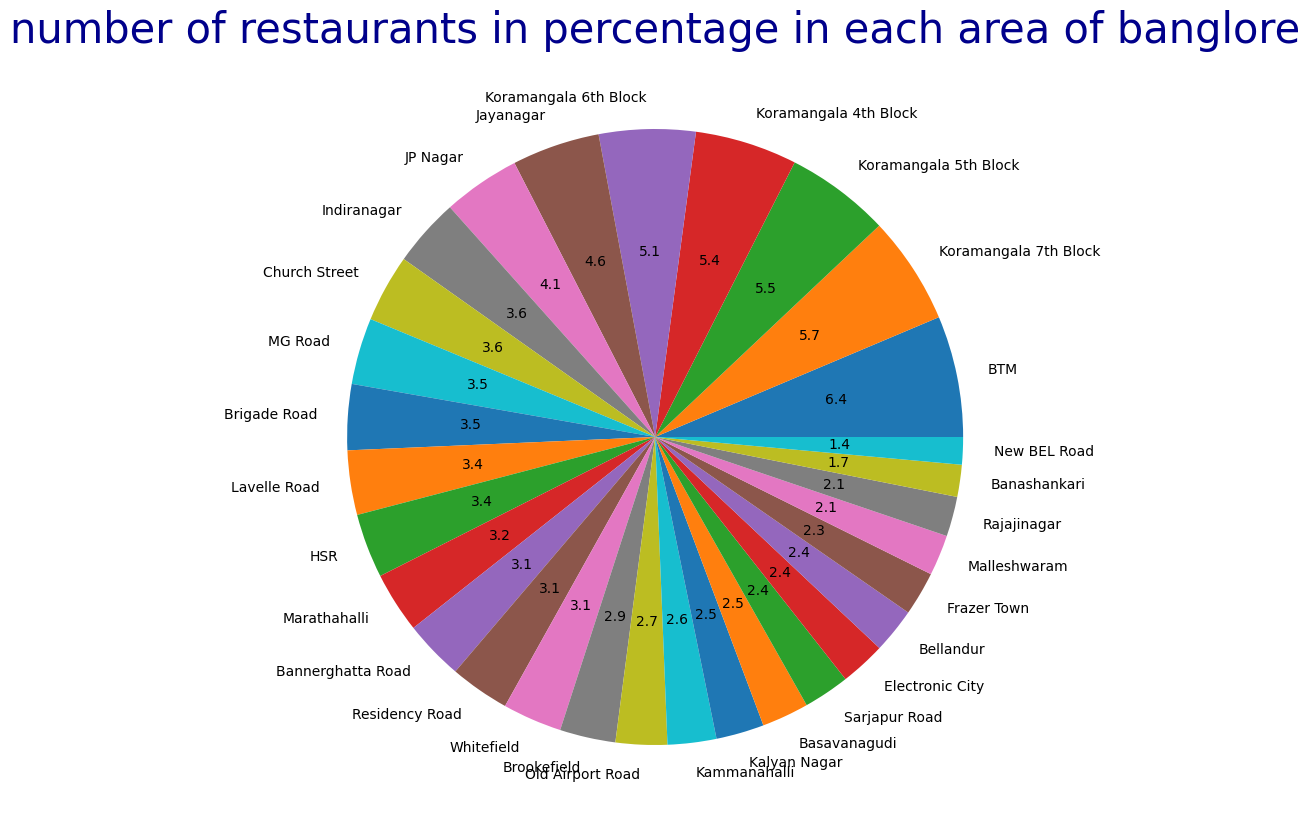

In [69]:
plt.figure(figsize=(10,10))

ax=df.city.value_counts()
# ax.plot(kind='pie',fontsize=20)
labels=df['city'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.1f')

plt.title('number of restaurants in percentage in each area of banglore',fontsize=30,color='darkblue')
plt.show()

## as we can see BTM area has the most number of resaurents

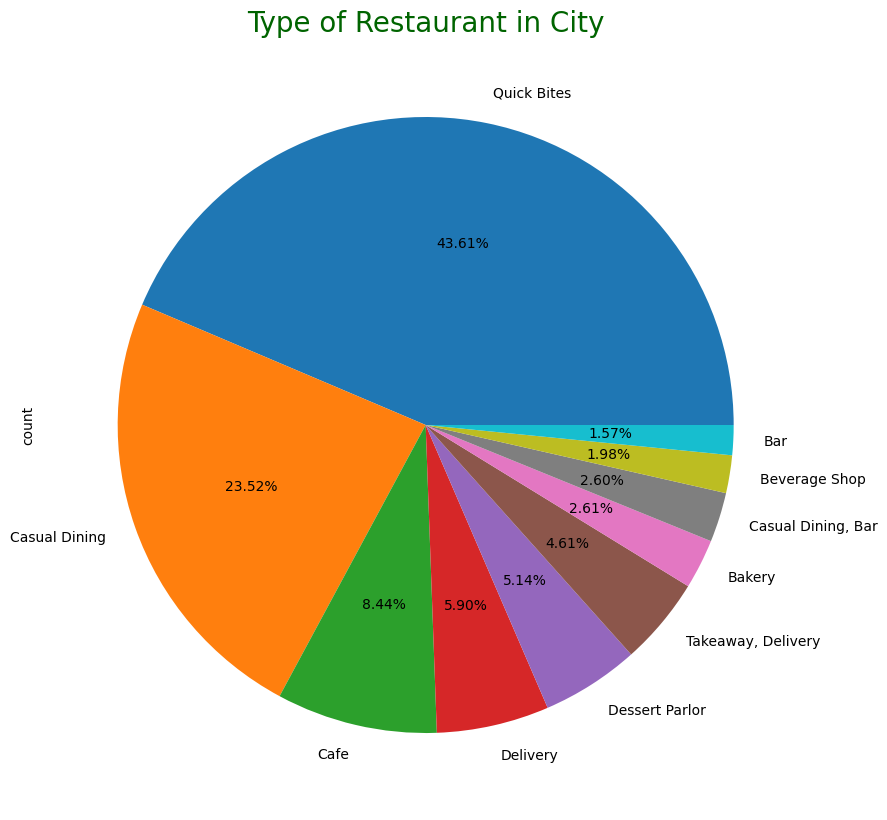

In [84]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10] # for only taking top 10 types of restaurent
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f%%')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

## most of the restaurent are for casual dining and quick bites 
## below is the number of these types of restaurants



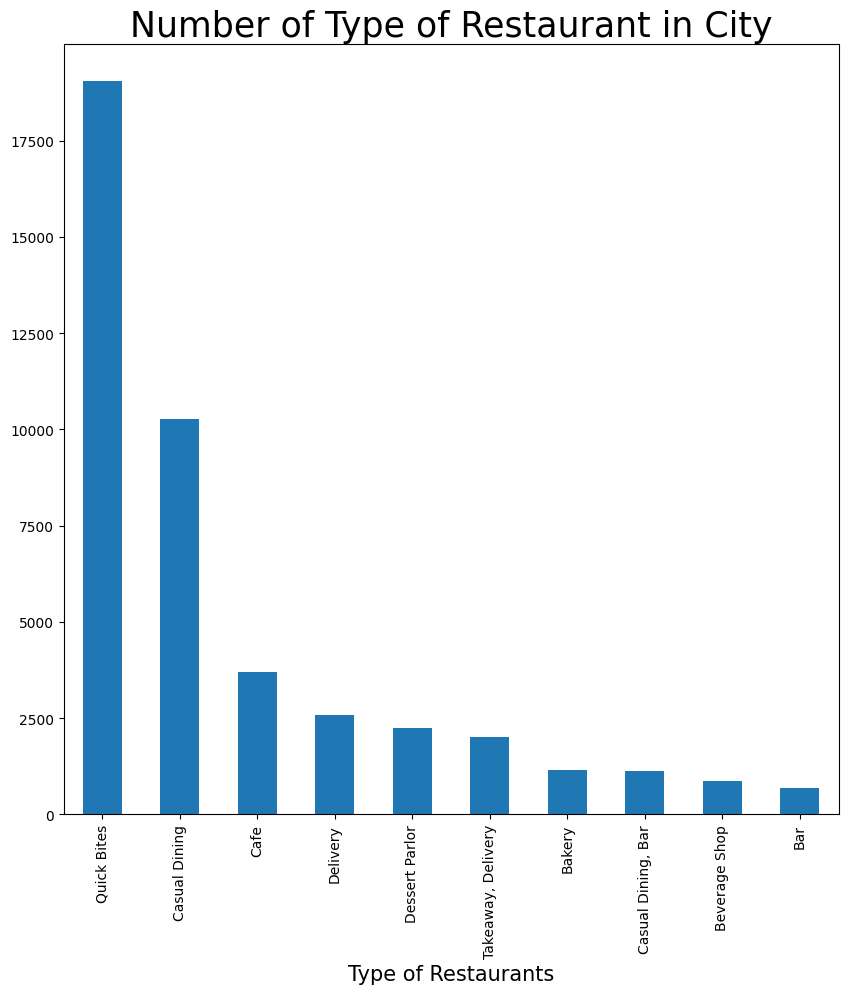

In [73]:

plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

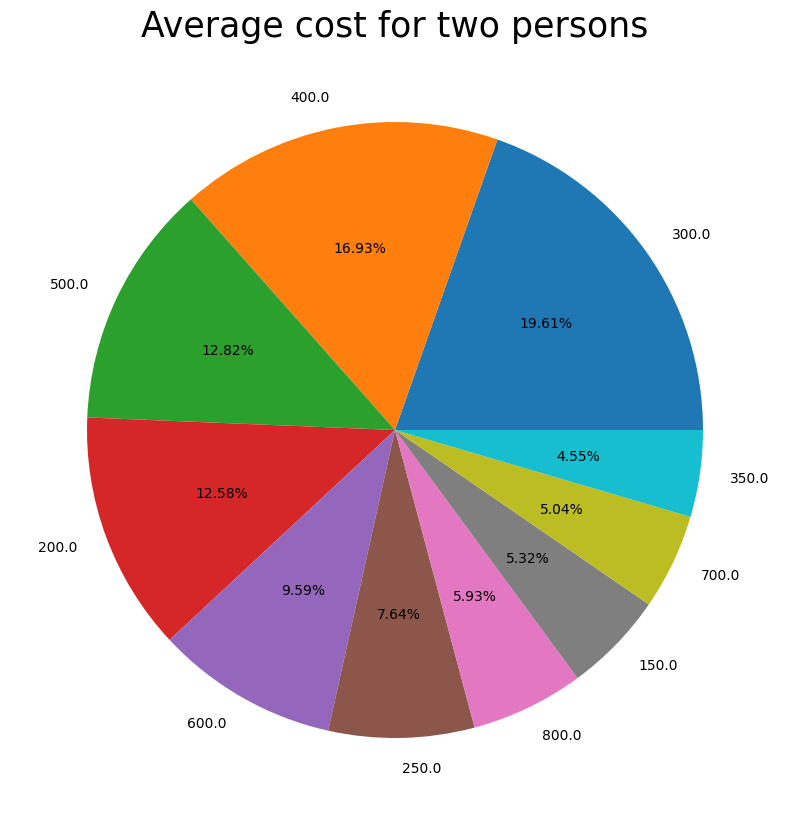

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# Get the top 10 most frequent values in 'avg_cost'
ax = df['avg_cost'].value_counts().iloc[:10]
labels = ax.index

# Plot pie chart
plt.pie(ax, labels=labels, autopct='%.2f%%')

plt.title("Average cost for two persons", fontsize=25)
plt.show()


## mostly resaurant cost arounf 200 to 500 for two person meal

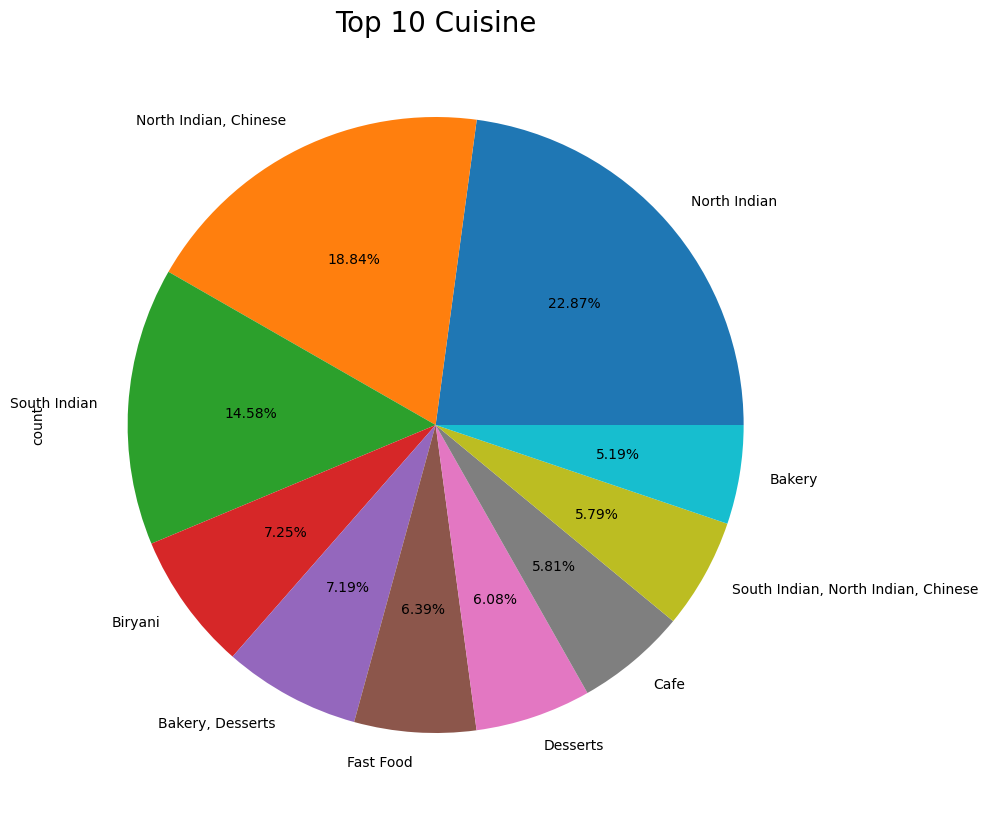

In [87]:
plt.figure(figsize=(10,10))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='pie', autopct='%.2f%%')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## because the data is from banglore so it is obvious that noth indian food we'll be in high demand

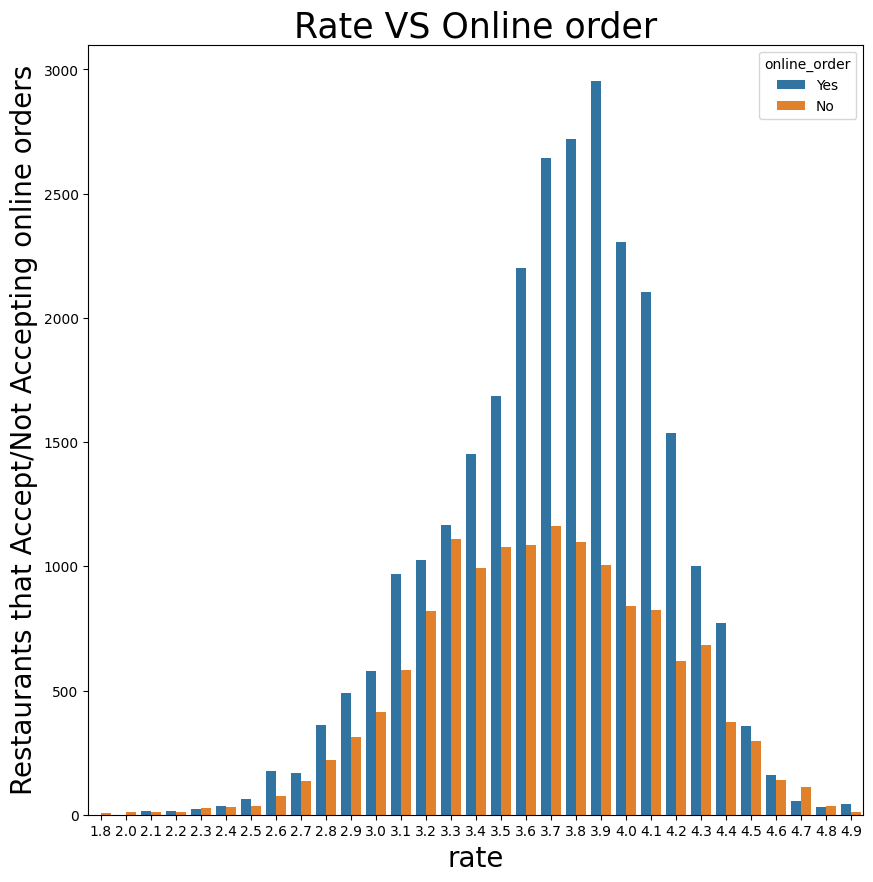

In [90]:
plt.figure(figsize=(10,10))

sns.countplot(x=df['rate'],hue=df['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

## as we can see no of restauarants is higher that aee accepting online orders and has rating b/w 3.5 to 4.5

# corelation

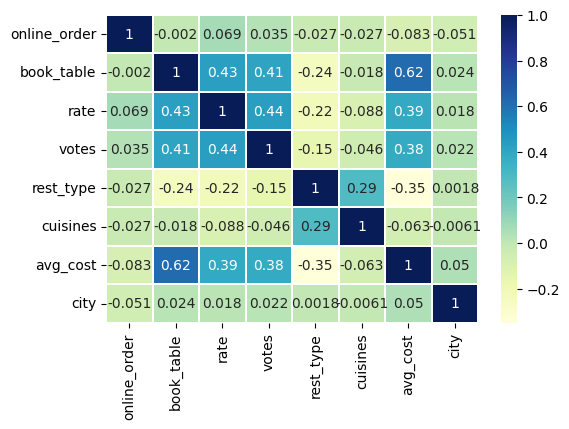

In [101]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

# Data Preprocessing

#  Data transformation
## lets Convert categorical data into numerical data using LabelEncoding
## Now we drop unwanted Columns

In [155]:
# del df['meal_type']

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [95]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,city
0,1,1,4.1,775,27,2145,800.0,1
1,1,0,4.1,787,27,947,800.0,1
2,1,0,3.8,918,22,761,800.0,1
3,0,0,3.7,88,78,2539,300.0,1
4,0,0,3.8,166,27,2174,600.0,1


# Data Transformation

## Feature Selection and Feature Scaling

In [99]:
df.shape

(51148, 8)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51148 entries, 0 to 51147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51148 non-null  int64  
 1   book_table    51148 non-null  int64  
 2   rate          41263 non-null  float64
 3   votes         51148 non-null  int64  
 4   rest_type     51148 non-null  int64  
 5   cuisines      51148 non-null  int64  
 6   avg_cost      51148 non-null  float64
 7   city          51148 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.1 MB


In [107]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 51147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41263 non-null  int64  
 1   book_table    41263 non-null  int64  
 2   rate          41263 non-null  float64
 3   votes         41263 non-null  int64  
 4   rest_type     41263 non-null  int64  
 5   cuisines      41263 non-null  int64  
 6   avg_cost      41263 non-null  float64
 7   city          41263 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


## feature imporatace using extratree regressor

In [108]:
from sklearn.ensemble import ExtraTreesRegressor


x2 = df.drop("rate", axis = 1).values
y2 = df["rate"].values

print("X = ", x2)
print("Y = ", y2)

X =  [[1.000e+00 1.000e+00 7.750e+02 ... 2.145e+03 8.000e+02 1.000e+00]
 [1.000e+00 0.000e+00 7.870e+02 ... 9.470e+02 8.000e+02 1.000e+00]
 [1.000e+00 0.000e+00 9.180e+02 ... 7.610e+02 8.000e+02 1.000e+00]
 ...
 [0.000e+00 0.000e+00 2.700e+01 ... 1.004e+03 1.500e+03 2.900e+01]
 [0.000e+00 1.000e+00 2.360e+02 ... 1.384e+03 2.500e+03 2.900e+01]
 [0.000e+00 0.000e+00 1.300e+01 ... 1.411e+03 1.500e+03 2.900e+01]]
Y =  [4.1 4.1 3.8 ... 3.6 4.3 3.4]


In [110]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x2, y2)
print(imp_features1.feature_importances_)

[0.01760108 0.17753625 0.36216964 0.08481745 0.17335463 0.13621346
 0.04830749]


<Axes: >

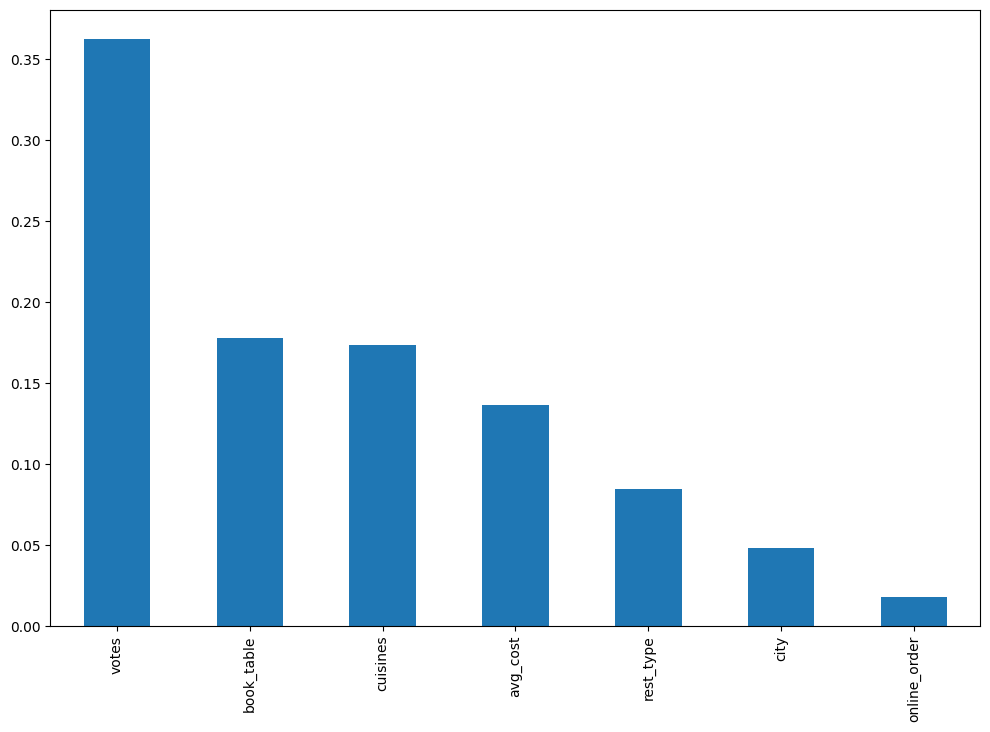

In [112]:
plt.figure(figsize = (12, 8))
columns = df.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

## selecting features

In [114]:
features=df.drop(['rate'],axis=1)
features.shape

(41263, 7)

In [115]:
features.dtypes

online_order      int64
book_table        int64
votes             int64
rest_type         int64
cuisines          int64
avg_cost        float64
city              int64
dtype: object

In [117]:
df['avg_cost'] = df['avg_cost'].astype('int64')

In [119]:
label=df['rate'].values
label

array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4])

## Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [121]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 7.22846847e-01,  2.35489419e+00,  4.77643702e-01, ...,
         1.00062855e+00,  4.21747018e-01, -1.60130244e+00],
       [ 7.22846847e-01, -4.24647529e-01,  4.91215798e-01, ...,
        -5.78972041e-01,  4.21747018e-01, -1.60130244e+00],
       [ 7.22846847e-01, -4.24647529e-01,  6.39377845e-01, ...,
        -8.24218877e-01,  4.21747018e-01, -1.60130244e+00],
       ...,
       [-1.38341891e+00, -4.24647529e-01, -3.68350279e-01, ...,
        -5.03815752e-01,  1.92732625e+00,  1.78142341e+00],
       [-1.38341891e+00,  2.35489419e+00, -1.31969608e-01, ...,
        -2.77382728e-03,  4.07815371e+00,  1.78142341e+00],
       [-1.38341891e+00, -4.24647529e-01, -3.84184391e-01, ...,
         3.28265200e-02,  1.92732625e+00,  1.78142341e+00]])

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [123]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((37136, 7), (4127, 7), (37136,), (4127,))

## Apply Regressions Models

In [124]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [125]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [126]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.2985501739308446
0.29904205929107774


In [128]:
lin_reg_pred=lin_reg.predict(X_test)
lin_reg_pred

array([3.58133045, 3.56656034, 3.54533313, ..., 3.51154998, 3.47105434,
       4.20313643])

In [129]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 29.904205929107775


In [131]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [132]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9884086425841462
0.9182851585942513


In [136]:
rfr_pred=rfr.predict(X_test)
rfr_pred

array([2.806, 3.804, 3.195, ..., 3.615, 4.062, 3.7  ])

In [138]:
rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 91.82851585942512


## As you can see from above data "Random Forest Regressor" Given the highest Accuacry score

## trying manual predication

In [147]:
rfr.predict([[1,0,13,73,1700,350,2]])

array([4.504])

## camparing actual vs RFR predicted rating 

In [150]:
compare=pd.DataFrame({"Actual Ratin":y_test,"Predicted Rating":np.round(rfr_pred,2)})
print(compare[:30])

    Actual Ratin  Predicted Rating
0            2.6              2.81
1            3.8              3.80
2            3.1              3.20
3            3.4              3.39
4            3.0              3.10
5            4.1              3.89
6            3.2              3.24
7            3.5              3.66
8            3.3              3.32
9            4.4              4.43
10           3.6              3.61
11           3.5              3.49
12           3.5              3.47
13           3.0              3.12
14           3.5              3.50
15           3.5              3.44
16           3.3              3.30
17           4.0              4.00
18           3.9              3.90
19           4.1              4.08
20           3.6              3.60
21           3.9              3.89
22           3.4              3.37
23           4.0              4.10
24           3.3              3.30
25           3.8              3.47
26           3.6              3.60
27           3.8    

# exporting pickle file

In [154]:
import pickle
with open('rating_prediction.pkl', 'wb') as file:
    pickle.dump(rfr, file)